<a href="https://colab.research.google.com/github/juliadmytrenko/CaliHousingPricePrediction/blob/main/CaliHousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cali House Price Prediction in Python - Full Machine Learning Project

It's going to be a regression task

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

# I want to predict the median house value

I'm going to scale values and prepare data
* missing values
* scaling
* from labels to numbers

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
data.dropna(inplace=True) # only non-null values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
train_data = X_train.join(y_train)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8596,-118.37,33.89,21.0,2696.0,548.0,1142.0,473.0,5.6091,<1H OCEAN,356800.0
9211,-120.31,37.11,38.0,1696.0,301.0,985.0,278.0,2.4054,INLAND,112500.0
11582,-118.03,33.76,32.0,2980.0,494.0,1370.0,481.0,5.0866,<1H OCEAN,223500.0
1860,-124.16,41.92,19.0,1668.0,324.0,841.0,283.0,2.1336,NEAR OCEAN,75000.0
19873,-119.30,36.34,45.0,3723.0,831.0,2256.0,770.0,1.8299,INLAND,63100.0
...,...,...,...,...,...,...,...,...,...,...
16712,-120.48,35.02,17.0,2721.0,477.0,1672.0,492.0,2.9798,<1H OCEAN,204800.0
12457,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,INLAND,74000.0
19861,-119.30,36.34,27.0,1515.0,358.0,1178.0,309.0,1.4432,INLAND,48100.0
16963,-122.31,37.54,46.0,2444.0,397.0,952.0,402.0,4.7500,NEAR OCEAN,388200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

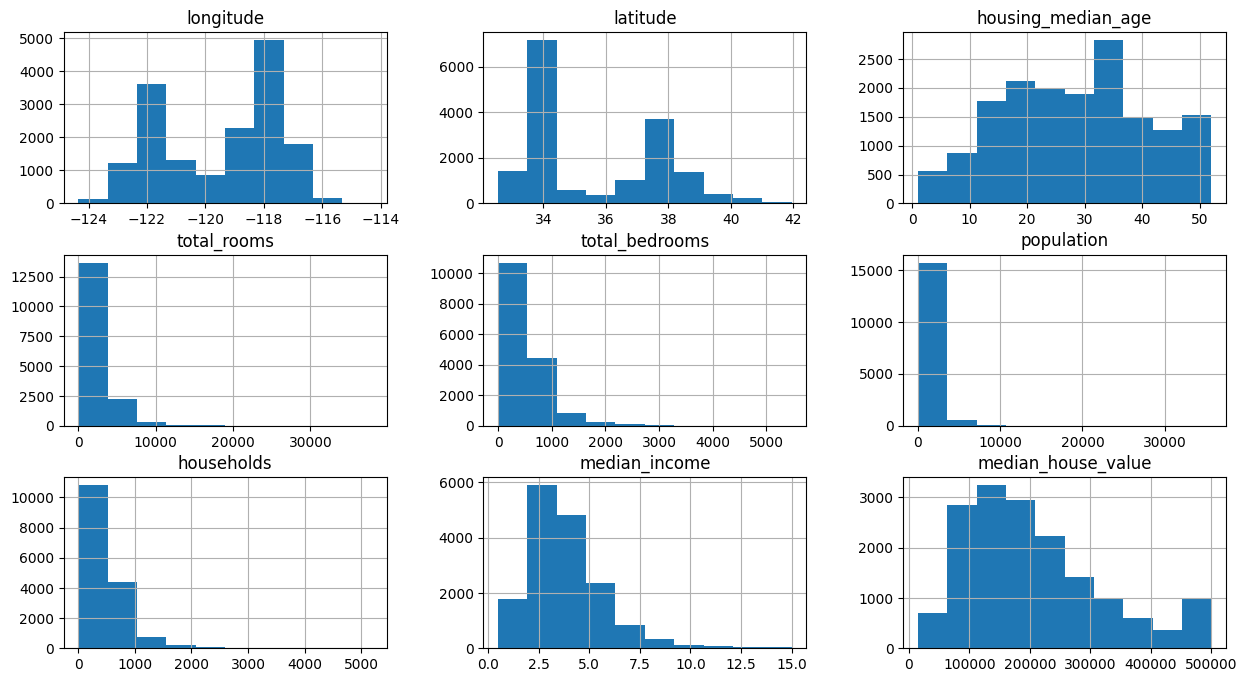

In [19]:
train_data.hist(figsize=(15, 8)) # histogram

In [20]:
train_data.corr(numeric_only=True) # numeric_only=True is important when you've got non-numerical data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924747,-0.112559,0.048265,0.072795,0.106479,0.059981,-0.016338,-0.047688
latitude,-0.924747,1.000000,0.016456,-0.040538,-0.071606,-0.115492,-0.076466,-0.078427,-0.143030
housing_median_age,-0.112559,0.016456,1.000000,-0.360720,-0.319355,-0.296301,-0.301787,-0.122804,0.107408
total_rooms,0.048265,-0.040538,-0.360720,1.000000,0.929040,0.857879,0.917913,0.198844,0.137858
total_bedrooms,0.072795,-0.071606,-0.319355,0.929040,1.000000,0.877923,0.979403,-0.009177,0.053318
population,0.106479,-0.115492,-0.296301,0.857879,0.877923,1.000000,0.907778,0.006503,-0.021697
households,0.059981,-0.076466,-0.301787,0.917913,0.979403,0.907778,1.000000,0.012395,0.068676
median_income,-0.016338,-0.078427,-0.122804,0.198844,-0.009177,0.006503,0.012395,1.000000,0.686174
median_house_value,-0.047688,-0.143030,0.107408,0.137858,0.053318,-0.021697,0.068676,0.686174,1.000000


<Axes: >

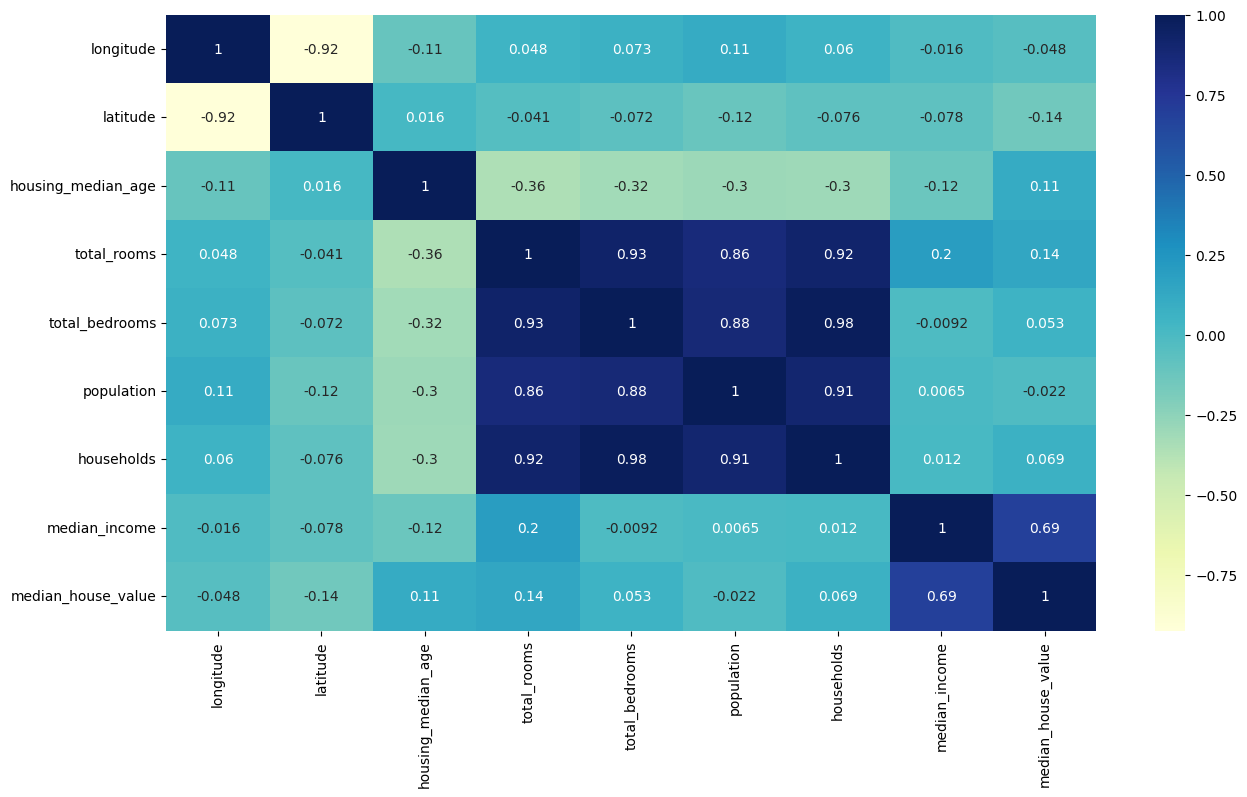

In [21]:
# correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

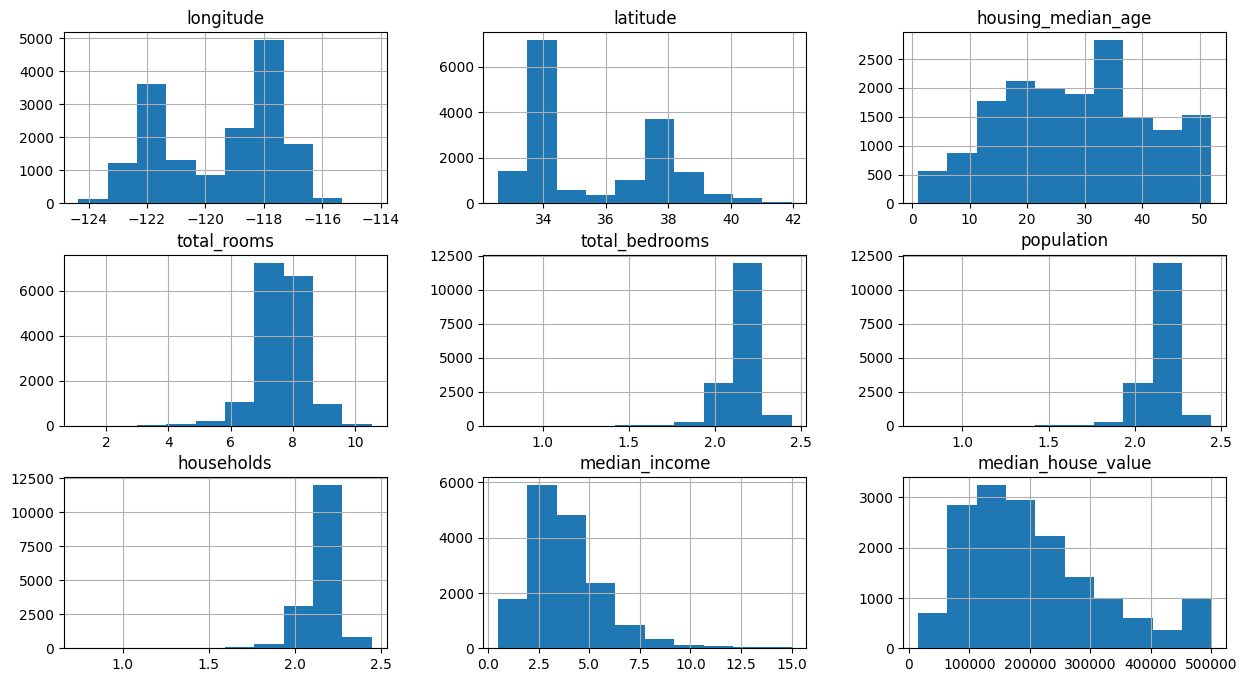

In [22]:
# bierzmey logarytm

train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_rooms"] + 1)
train_data["population"] = np.log(train_data["total_rooms"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

train_data.hist(figsize=(15, 8)) # histogram

In [23]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7221
INLAND,5188
NEAR OCEAN,2127
NEAR BAY,1808
ISLAND,2


In [24]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8596,True,False,False,False,False
9211,False,True,False,False,False
11582,True,False,False,False,False
1860,False,False,False,False,True
19873,False,True,False,False,False
...,...,...,...,...,...
16712,True,False,False,False,False
12457,False,True,False,False,False
19861,False,True,False,False,False
16963,False,False,False,False,True


In [25]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [26]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8596,-118.37,33.89,21.0,7.899895,2.186040,2.186040,2.186040,5.6091,356800.0,True,False,False,False,False
9211,-120.31,37.11,38.0,7.436617,2.132581,2.132581,2.132581,2.4054,112500.0,False,True,False,False,False
11582,-118.03,33.76,32.0,8.000014,2.197226,2.197226,2.197226,5.0866,223500.0,True,False,False,False,False
1860,-124.16,41.92,19.0,7.419980,2.130607,2.130607,2.130607,2.1336,75000.0,False,False,False,False,True
19873,-119.30,36.34,45.0,8.222554,2.221652,2.221652,2.221652,1.8299,63100.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,-120.48,35.02,17.0,7.909122,2.187076,2.187076,2.187076,2.9798,204800.0,True,False,False,False,False
12457,-114.58,33.63,29.0,7.235619,2.108469,2.108469,2.108469,3.3438,74000.0,False,True,False,False,False
19861,-119.30,36.34,27.0,7.323831,2.119123,2.119123,2.119123,1.4432,48100.0,False,True,False,False,False
16963,-122.31,37.54,46.0,7.801800,2.174956,2.174956,2.174956,4.7500,388200.0,False,False,False,False,True


<Axes: >

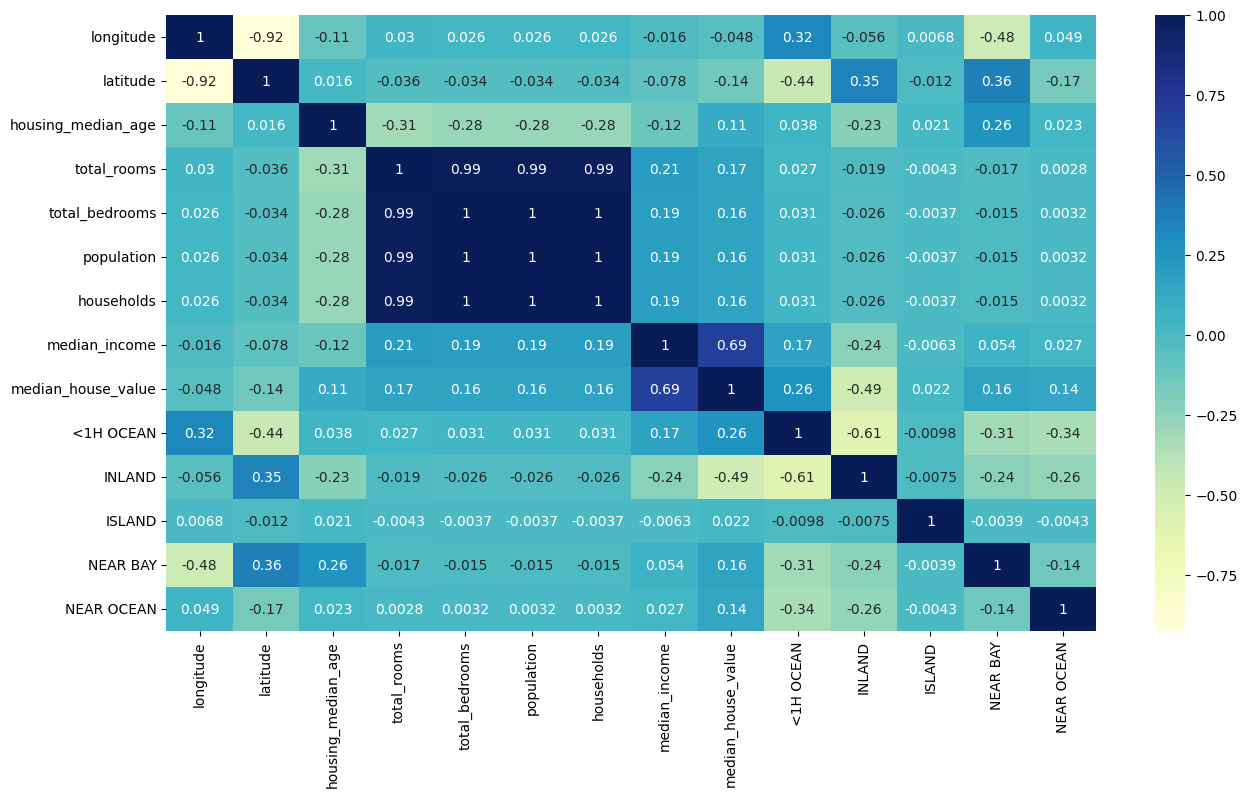

In [27]:
# correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Widać na wykresie wybrzeże Kalifornii

<Axes: xlabel='latitude', ylabel='longitude'>

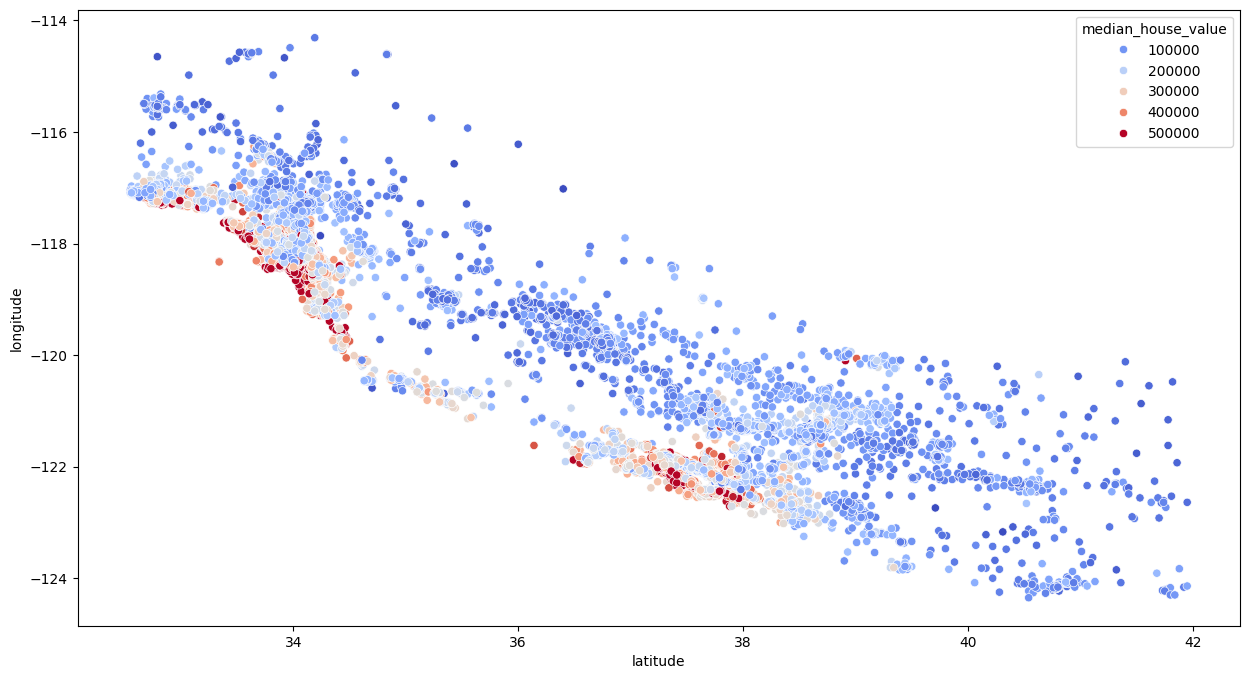

In [28]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

<Axes: >

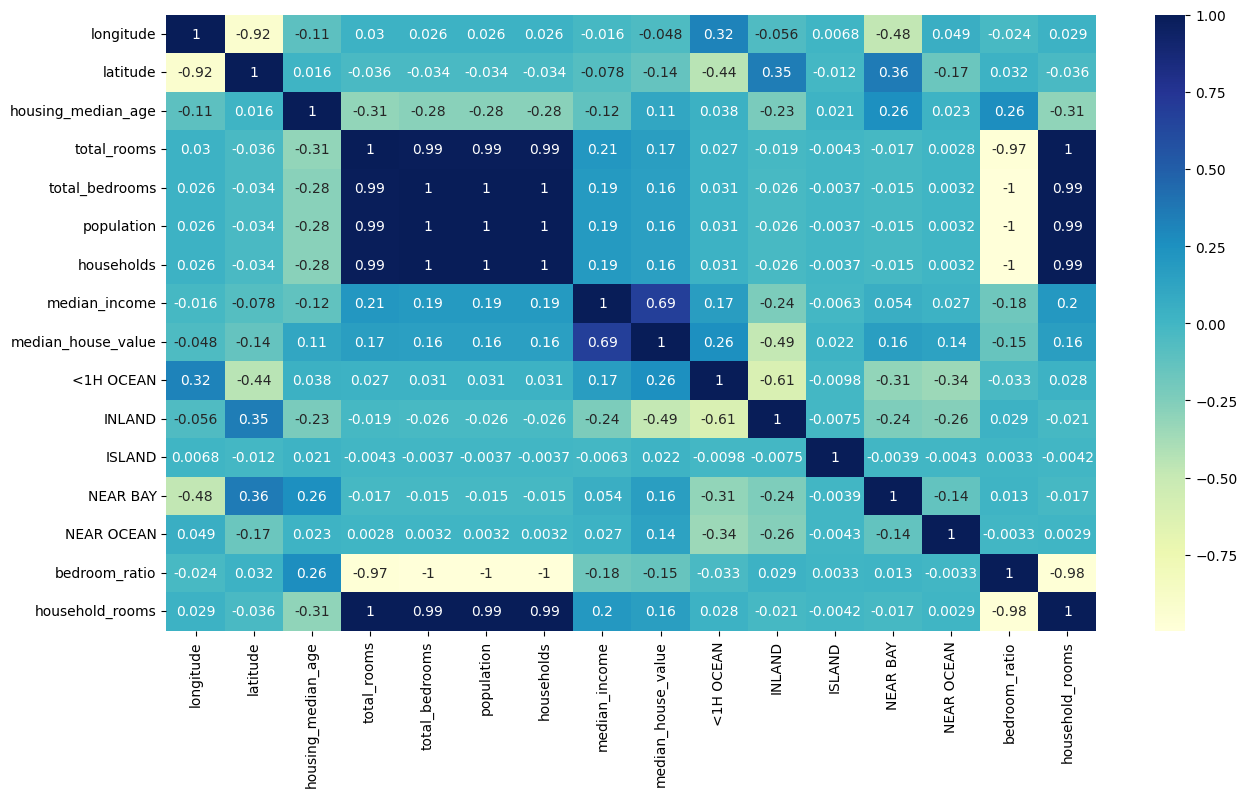

In [29]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]  / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]  / train_data["households"]

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Creating linear regression model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # skalowanie

# Use the X_train and y_train from the train-test split
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [31]:
X_train_s[5]

array([ 0.14329271,  0.35972947, -0.92393896,  0.01239626,  0.05589188,
        0.05589188,  0.05589188,  0.23983188, -0.88957432,  1.46653758,
       -0.01106206, -0.35265243, -0.38676683, -0.07785621,  0.02286754])

In [32]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_rooms"] + 1)
test_data["population"] = np.log(test_data["total_rooms"] + 1)
test_data["households"] = np.log(test_data["total_rooms"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]  / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]  / test_data["households"]



In [33]:
X_test, y_test = test_data.drop("median_house_value", axis=1), test_data['median_house_value']

In [34]:
X_test_s = scaler.transform(X_test)

In [35]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14216,-117.05,32.68,35.0,8.135933,2.212215,2.212215,2.212215,3.9922,129800.0,False,False,False,False,True,0.271907,3.677731
17105,-122.22,37.46,13.0,7.968666,2.193737,2.193737,2.193737,6.0255,409300.0,False,False,False,False,True,0.275295,3.632462
9582,-120.49,37.32,10.0,7.151485,2.098200,2.098200,2.098200,3.0263,118300.0,False,True,False,False,False,0.293394,3.408390
11847,-120.66,39.72,15.0,8.233238,2.222810,2.222810,2.222810,2.2019,130500.0,False,True,False,False,False,0.269980,3.703978
11888,-117.37,33.97,34.0,8.209852,2.220274,2.220274,2.220274,2.5804,92400.0,False,True,False,False,False,0.270440,3.697676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13115,-121.13,38.37,10.0,6.942157,2.072185,2.072185,2.072185,7.0326,241100.0,False,True,False,False,False,0.298493,3.350163
10660,-117.80,33.66,16.0,7.841100,2.179411,2.179411,2.179411,4.0000,223400.0,True,False,False,False,False,0.277947,3.597806
19807,-118.96,36.66,18.0,7.172425,2.100766,2.100766,2.100766,3.1964,80000.0,False,True,False,False,False,0.292895,3.414196
12535,-121.51,38.56,43.0,6.955593,2.073875,2.073875,2.073875,1.0649,137500.0,False,True,False,False,False,0.298159,3.353911


In [36]:
reg.score(X_test, y_test)

0.6098385588310129

## Random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [38]:
forest.score(X_test_s, y_test)

0.8188558181816282

In [39]:
# K-fold regression

In [40]:
from sklearn.model_selection import GridSearchCV # cv cross-validation

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest,
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
param_grid = {
    # "n_estimators": [3, 10, 30],
    # "max_features": [2, 4, 6, 8],
      "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest,
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_
grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)